In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
from operator import itemgetter
import pandas as pd
from sklearn.cross_validation import train_test_split

import csv
import nupic

## Table of contents
* Old, from folder "code" with matlab files ( By A.E. )
* 24 channel's data
* 24 channel's data: CrossValidation
* 24 channel's data with resample: CrossValidation

### 1. 24 channel's data 

In [2]:
data_1 = scipy.io.loadmat('./lab_data/24chan/alex_long_1.mat')
data_2 = scipy.io.loadmat('./lab_data/24chan/alex_long_2.mat')
print data_1.keys()
print data_1['data_cur'].shape, data_1['states_cur'].shape
print data_1['data_cur']

['__version__', '__globals__', '__header__', 'chan_names', 'states_cur', 'data_cur', 'srate']
(24, 100717) (1, 100717)
[[ -3.02503101e+03  -3.02501318e+03  -3.02519214e+03 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -3.89819751e+03  -3.90012866e+03  -3.90227441e+03 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -5.94164746e+03  -5.93876855e+03  -5.93717676e+03 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [ -6.77808545e+03  -6.77838916e+03  -6.75793311e+03 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -1.31518008e+04  -1.31504600e+04  -1.31444697e+04 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -1.78813934e-02  -1.78813934e-02  -1.78813934e-02 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


[1 1 1 ..., 6 6 6] [1 1 1 ..., 6 6 6]
[1 2 6] [1 2 6]


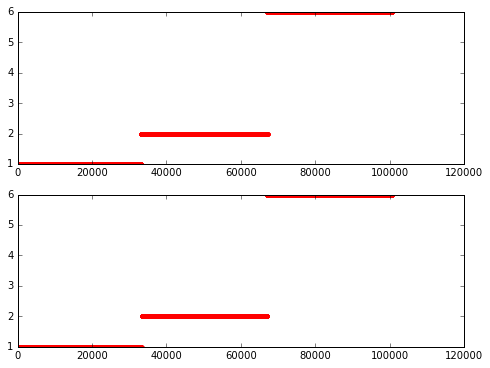

In [3]:
print data_1['states_cur'][0], data_2['states_cur'][0]
print np.unique(data_1['states_cur'][0]), np.unique(data_2['states_cur'][0])
plt.figure(2, figsize = (8,6))
plt.subplot(2, 1, 1)
plt.plot(range(len(data_1['states_cur'][0])), data_1['states_cur'][0], '.r')

plt.subplot(2, 1, 2)
plt.plot(range(len(data_2['states_cur'][0])), data_2['states_cur'][0], '.r')

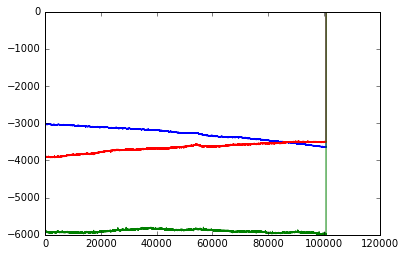

In [4]:
plt.plot(range(len(data_1['states_cur'][0])), data_1['data_cur'][0], '-b')
plt.plot(range(len(data_1['states_cur'][0])), data_1['data_cur'][1], '-r')
plt.plot(range(len(data_1['states_cur'][0])), data_1['data_cur'][2], '-g')

In [3]:
temp = data_1['data_cur'].T
names_df = ['field' + str(i+1) for i in range(temp.shape[1])]
tempdf1 = pd.DataFrame(temp)
tempdf1[24] = [0 if i == 6 else i for i in data_1['states_cur'][0]]

temp = data_2['data_cur'].T
tempdf2 = pd.DataFrame(temp)
tempdf2[24] = [0 if i == 6 else i for i in data_2['states_cur'][0]]

print tempdf1.head()

            0            1            2           3           4           5   \
0 -3025.031006 -3898.197510 -5941.647461 -143.265717  223.767761 -896.394226   
1 -3025.013184 -3900.128662 -5938.768555 -139.367584  225.287674 -896.894958   
2 -3025.192139 -3902.274414 -5937.176758 -138.205292  225.430725 -896.054504   
3 -3022.474121 -3898.537109 -5932.116699 -136.184692  228.291748 -893.175598   
4 -3019.648682 -3890.043457 -5928.969238 -131.589172  232.779984 -891.941772   

             6            7             8            9  ...            15  \
0 -11081.028320 -9336.876953 -50944.109375 -8007.466797 ... -31958.019531   
1 -11080.598633 -9336.948242 -50917.480469 -8008.665039 ... -31957.037109   
2 -11080.205078 -9336.787109 -50951.457031 -8010.721191 ... -32048.822266   
3 -11071.533203 -9329.348633 -50996.410156 -8014.029297 ... -32114.500000   
4 -11068.529297 -9326.237305 -50985.449219 -8013.957520 ... -32055.687500   

            16           17          18           19    

In [6]:
print np.unique(data_1['data_cur'][13])
print np.unique(data_2['data_cur'][13])

[ 0.]
[ 0.]


### Замечание
Поскольку в field14 все нули, уберем его

In [4]:
tempdf1 = tempdf1.drop(13, 1)
tempdf2 = tempdf2.drop(13, 1)
names_df = ['field' + str(i+1) if (i+1 < 14) else 'field' + str(i+2) for i in range(tempdf1.shape[1] - 1)]

In [5]:
nfields = len(tempdf1.columns) - 1
new_header = [names_df + ['classification'], ['float'] * (nfields) + ['int'],
              ['S'] * nfields + ['C'] ]
for i in new_header:
    i = ','.join(i)
    print i

field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,classification
float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int
S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,C


In [9]:
with open('./lab_data/24chan/24chan_train_full.csv', 'wb') as csvfile:
    filewriter = csv.writer(csvfile, #delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for line in new_header:
        filewriter.writerow(line)
    tempdf1.to_csv(csvfile, header = False, index = False)

with open('./lab_data/24chan/24chan_test_full.csv', 'wb') as csvfile:
    filewriter = csv.writer(csvfile, #delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for line in new_header:
        filewriter.writerow(line)
    tempdf2.to_csv(csvfile, header = False, index = False)

In [9]:
print "MIN and MAX values for each column"
for i in tempdf.columns:
    print i+1, min(tempdf[i]), max(tempdf[i])

MIN and MAX values for each column
1 -3648.39428711 0.0
2 -3930.25878906 0.0
3 -5998.58154297 0.0
4 -147.789718628 453.811889648
5 0.0 314.462188721
6 -1015.77044678 0.0
7 -11088.2695312 0.0
8 -9336.94824219 0.0
9 -52709.5898438 0.0
10 -8252.37011719 0.0
11 0.0 2848.23779297
12 -6205.79101562 0.0
13 0.0 2256.07763672
15 -13038.59375 0.0
16 -32720.9296875 0.0
17 -2177.86425781 0.0
18 0.0 1145.01708984
19 -292.736297607 28.3062458038
20 -7302.90429688 0.0
21 -3948.30102539 0.0
22 -6918.31103516 0.0
23 -13195.2167969 0.0
24 -0.0178813934326 0.0
25 0 2


### 3. 24 channel's data: CrossValidation

In [10]:
train_index, test_index = train_test_split(range(tempdf.shape[0]), test_size=0.33, random_state=42)
#train_index.sort(), test_index.sort()

traindf, testdf = tempdf.iloc[train_index], tempdf.iloc[test_index]

#traindf, testdf = train_test_split(tempdf, test_size=0.33, random_state=42)


with open('./lab_data/24chan/24chan_train1.csv', 'wb') as csvfile:
    filewriter = csv.writer(csvfile, #delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for line in new_header:
        filewriter.writerow(line)
    traindf.to_csv(csvfile, header = False, index = False)

with open('./lab_data/24chan/24chan_test1.csv', 'wb') as csvfile:
    filewriter = csv.writer(csvfile, #delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for line in new_header:
        filewriter.writerow(line)
    testdf.to_csv(csvfile, header = False, index = False)

In [11]:
print traindf.shape
print testdf.shape

# print traindf.head
# print testdf.head

(67480, 24)
(33237, 24)


### 4. 24 channel's data with resample

In [6]:
from scipy import signal

In [8]:
resample_num1 = tempdf1.shape[0] // 5 + 1
resample_num2 = tempdf2.shape[0] // 5 + 1
print resample_num1, resample_num2
df_resample1 = signal.resample(tempdf1, resample_num1)
df_resample2 = signal.resample(tempdf2, resample_num2)

20144 20121


In [9]:
df_resample1 = pd.DataFrame(df_resample1)
df_resample2 = pd.DataFrame(df_resample2)
nfields = len(tempdf1.columns)
# Below for tempdf we use nfields (but not nfields - 1) because we delete 'field14' previously
df_resample1[nfields - 1] = np.array((tempdf1[nfields])[0::5])
df_resample2[nfields - 1] = np.array((tempdf2[nfields])[0::5])

In [10]:
print new_header

with open('./lab_data/24chan/24chan_train_resample.csv', 'wb') as csvfile:
    filewriter = csv.writer(csvfile, #delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for line in new_header:
        filewriter.writerow(line)
    df_resample1.to_csv(csvfile, header = False, index = False)

with open('./lab_data/24chan/24chan_test_resample.csv', 'wb') as csvfile:
    filewriter = csv.writer(csvfile, #delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for line in new_header:
        filewriter.writerow(line)
    df_resample2.to_csv(csvfile, header = False, index = False)

[['field1', 'field2', 'field3', 'field4', 'field5', 'field6', 'field7', 'field8', 'field9', 'field10', 'field11', 'field12', 'field13', 'field15', 'field16', 'field17', 'field18', 'field19', 'field20', 'field21', 'field22', 'field23', 'field24', 'classification'], ['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'int'], ['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C']]


In [12]:
df_resample1.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1698.267973,-2227.094048,-3371.315295,-97.694010,127.799416,-506.481208,-6300.111766,-5321.451151,-29131.319062,-4542.698801,...,-18236.154924,-1270.553752,597.755956,-165.251096,-4131.301810,-2270.282505,-3843.896158,-7473.050101,-0.010157,1
1,-3369.874326,-4316.491042,-6588.686680,-135.312760,255.609132,-993.467705,-12284.616892,-10340.446605,-56461.443767,-8903.983556,...,-35496.177903,-2377.788449,1170.531026,-306.322645,-8077.320842,-4353.887321,-7536.446236,-14602.891801,-0.019854,1
2,-2811.257545,-3658.006301,-5531.576713,-133.670115,213.237065,-831.317236,-10307.883984,-8682.424745,-47911.824102,-7490.667516,...,-29916.413440,-1994.960027,983.868491,-262.532320,-6780.594518,-3679.653335,-6323.989823,-12280.181197,-0.016695,1
3,-3179.638859,-4083.630729,-6209.133002,-124.761629,242.276280,-935.320482,-11575.337707,-9736.468248,-53493.046353,-8418.065282,...,-33551.156148,-2213.031779,1108.725202,-276.657752,-7609.464653,-4097.144396,-7095.800344,-13778.385985,-0.018743,1
4,-2901.991291,-3765.819520,-5697.672109,-133.261729,219.803744,-855.493145,-10623.974871,-8946.833963,-49270.966940,-7730.627723,...,-30822.877428,-2054.510161,1015.984914,-264.477199,-6980.175672,-3782.269789,-6514.289777,-12651.336645,-0.017200,1
